# KNN Algorithm

In [4]:
import pandas as pd
import numpy as np

!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: C:\Users\chami\OneDrive\Desktop\Portfolio\MyPortfolio\Machine Learning\Supervised Learning\multiclass.csv

  0%|          | 0.00/14.6k [00:00<?, ?B/s]
100%|##########| 14.6k/14.6k [00:00<?, ?B/s]


In [5]:
df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


Data Description

feature Description Region where the store is located (1: Tier-1 city, 2: Tier-2 city, 3:Tier-3 city) Fresh Fresh food products delivery count Milk milk products delivery count Grocery Grocery products delivery count Frozen Frozen food products delivery count Detergents_Paper washing products delivery count Delicassen imported products, cooked meat delivery count class Store catgeory (Class1, Class2, Class3)

Class1 : High Traffic (Needs a high number of delivery partners)
Class2 : Moderate Traffic (Needs a decent number of delivery partners)
Class3 : Low Traffic (Needs a very small number of delivery partners)

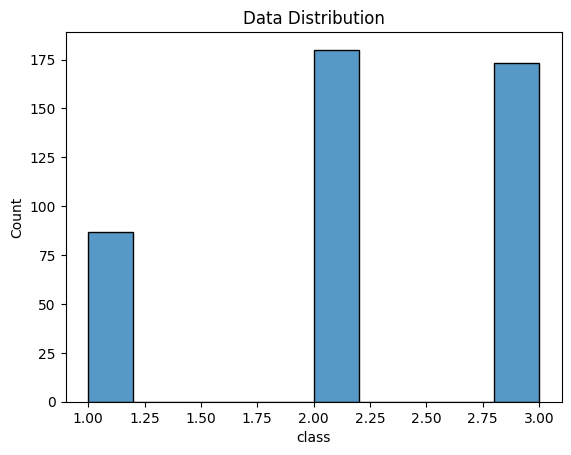

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="class")
plt.title('Data Distribution')
plt.show()
#Class 1 is imbalanced

In [8]:
X=df[['Region', 'Fresh',    'Milk', 'Grocery',  'Frozen',   'Detergents_Paper', 'Delicassen'    ]]
y=df[['class']]

In [12]:
#Applying Principal Component analysis to visualize Data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [13]:
# reducing features to just 2 features for visualization purpose
pca = PCA(n_components=2)
visualize = pca.fit_transform(X)

In [49]:
def scatter_visualize(visualize1,y_label):
  scatter = plt.scatter(visualize1[:,0] ,visualize1[:,1],c = y_label )
  plt.legend(handles=scatter.legend_elements()[0],labels=['Class1','Class2','Class3'])
  plt.show()

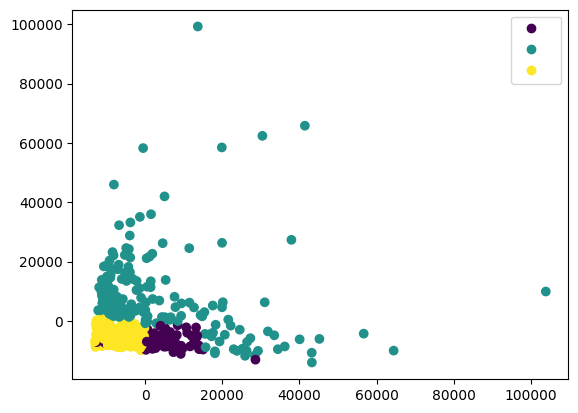

In [50]:
scatter_visualize(visualize,y.values[:,0])

## KNN Implementation

In [51]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


In [52]:
y_train.value_counts()
#Data is imbalanced for class 1 

class
3        99
2        95
1        53
Name: count, dtype: int64

In [55]:
#Balancing Data
from imblearn.over_sampling import SMOTE
# Create an instance of SMOTE
smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)
y_sm.value_counts()

class
1        99
2        99
3        99
Name: count, dtype: int64

In [ ]:
#standardizing Data 
from sklearn.preprocessing import StandardScaler
st =  StandardScaler()
X_sm = st.fit_transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)

In [56]:
#KNN implementation
def knn(X,Y,queryPoint,k):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]

    distances = np.array(distances)

    classes_counts = np.unique(distances[:,1],return_counts=True)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred),distances